# Load data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
coding = pd.read_csv("coding_9_features.csv")
noncoding = pd.read_csv("noncoding_9_features.csv")

In [3]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.3871,0.359435,18,2618,981,981,0.284229,9.588915,0.112385,1
1,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
2,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
3,1.0718,0.699278,302,3465,2535,2535,0.270346,11.870000,0.051948,1
4,1.0718,0.699250,302,3468,2538,2538,0.271500,11.870000,0.051903,1


In [4]:
coding.shape

(111275, 10)

In [6]:
noncoding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.6045,0.553410,23,1657,231,231,0.458169,8.878344,0.068841,0
1,0.5691,0.585674,32,712,228,228,0.497487,9.470164,0.067511,0
2,0.4430,0.467290,11,535,111,111,0.518787,8.080870,0.101124,0
3,0.6268,0.533277,20,1187,258,258,0.387685,9.154591,0.058228,0
4,0.6034,0.535593,9,590,225,225,0.580721,9.527154,0.102041,0


In [7]:
noncoding.shape

(58022, 10)

In [11]:
# taking 58000 sequences from both dataframes
noncoding = noncoding.head(58000)
coding = coding.head(58000)

In [24]:
# combining both dataframes
dataset = coding.merge(noncoding, how = "outer")


In [25]:
dataset.shape

(116000, 10)

In [26]:
dataset.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.3871,0.359435,18,2618,981,981,0.284229,9.588915,0.112385,1
1,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
2,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
3,1.0718,0.699278,302,3465,2535,2535,0.270346,11.870000,0.051948,1
4,1.0718,0.699250,302,3468,2538,2538,0.271500,11.870000,0.051903,1


In [27]:
dataset.tail()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
115995,0.3542,0.348845,21,2858,216,216,0.256511,9.606515,0.122899,0
115996,0.4723,0.502060,37,1942,243,243,0.384792,9.696899,0.066461,0
115997,0.6034,0.470410,7,659,183,183,0.516090,7.742005,0.073059,0
115998,0.4989,0.472720,60,7203,321,321,0.327968,9.415108,0.062917,0
115999,0.4748,0.506040,9,745,255,255,0.515379,8.881632,0.060484,0


In [48]:
# shuffle the dataset
shuffled_dataset = dataset.sample(frac=1, random_state = 42)

In [49]:
shuffled_dataset.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
112555,0.6507,0.403162,3,506,144,144,0.521614,9.517548,0.065476,0
51778,0.6126,0.522097,28,973,747,747,0.396134,9.715982,0.043210,1
35841,1.1553,0.568205,21,975,195,195,0.425404,6.374175,0.055385,1
114991,0.4187,0.412819,15,1451,252,252,0.404864,9.579244,0.109731,0
107442,0.3752,0.390840,10,1310,177,177,0.329321,9.437414,0.087156,0


# Test Train Split

In [51]:
train, test = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)

In [52]:
train.shape

(92800, 10)

In [53]:
test.shape

(23200, 10)

# Data visualization

In [59]:
train = train.drop("coding/noncoding", axis = 1)  # dropping the label from the train set

In [74]:
corr_matrix = train.corr()
corr_matrix

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity
Fickett Score,1.000000,0.484002,0.215962,-0.055799,0.253750,0.253750,0.240564,-0.105271,-0.374506
GC content,0.484002,1.000000,0.322623,-0.105080,0.026194,0.026194,0.244266,0.042164,-0.635242
CpG Islands,0.215962,0.322623,1.000000,0.681556,0.669950,0.669950,-0.337224,0.107987,-0.133247
Transcript Length,-0.055799,-0.105080,0.681556,1.000000,0.640367,0.640367,-0.414195,0.035393,0.128559
ORF Length,0.253750,0.026194,0.669950,0.640367,1.000000,1.000000,-0.251410,-0.014899,-0.006860
ORF Ratio,0.253750,0.026194,0.669950,0.640367,1.000000,1.000000,-0.251410,-0.014899,-0.006860
Relative Codon Bias,0.240564,0.244266,-0.337224,-0.414195,-0.251410,-0.251410,1.000000,0.004871,-0.193744
Isoelectric Potential,-0.105271,0.042164,0.107987,0.035393,-0.014899,-0.014899,0.004871,1.000000,0.053362
Aromaticity,-0.374506,-0.635242,-0.133247,0.128559,-0.006860,-0.006860,-0.193744,0.053362,1.000000


In [78]:
corr_matrix["Fickett Score"].sort_values(ascending = False) #checking how much each attribute correlates with fickett score

Fickett Score            1.000000
GC content               0.484002
ORF Length               0.253750
ORF Ratio                0.253750
Relative Codon Bias      0.240564
CpG Islands              0.215962
Transcript Length       -0.055799
Isoelectric Potential   -0.105271
Aromaticity             -0.374506
Name: Fickett Score, dtype: float64

In [79]:
corr_matrix["GC content"].sort_values(ascending = False) #checking how much each attribute correlates with GC content

GC content               1.000000
Fickett Score            0.484002
CpG Islands              0.322623
Relative Codon Bias      0.244266
Isoelectric Potential    0.042164
ORF Length               0.026194
ORF Ratio                0.026194
Transcript Length       -0.105080
Aromaticity             -0.635242
Name: GC content, dtype: float64

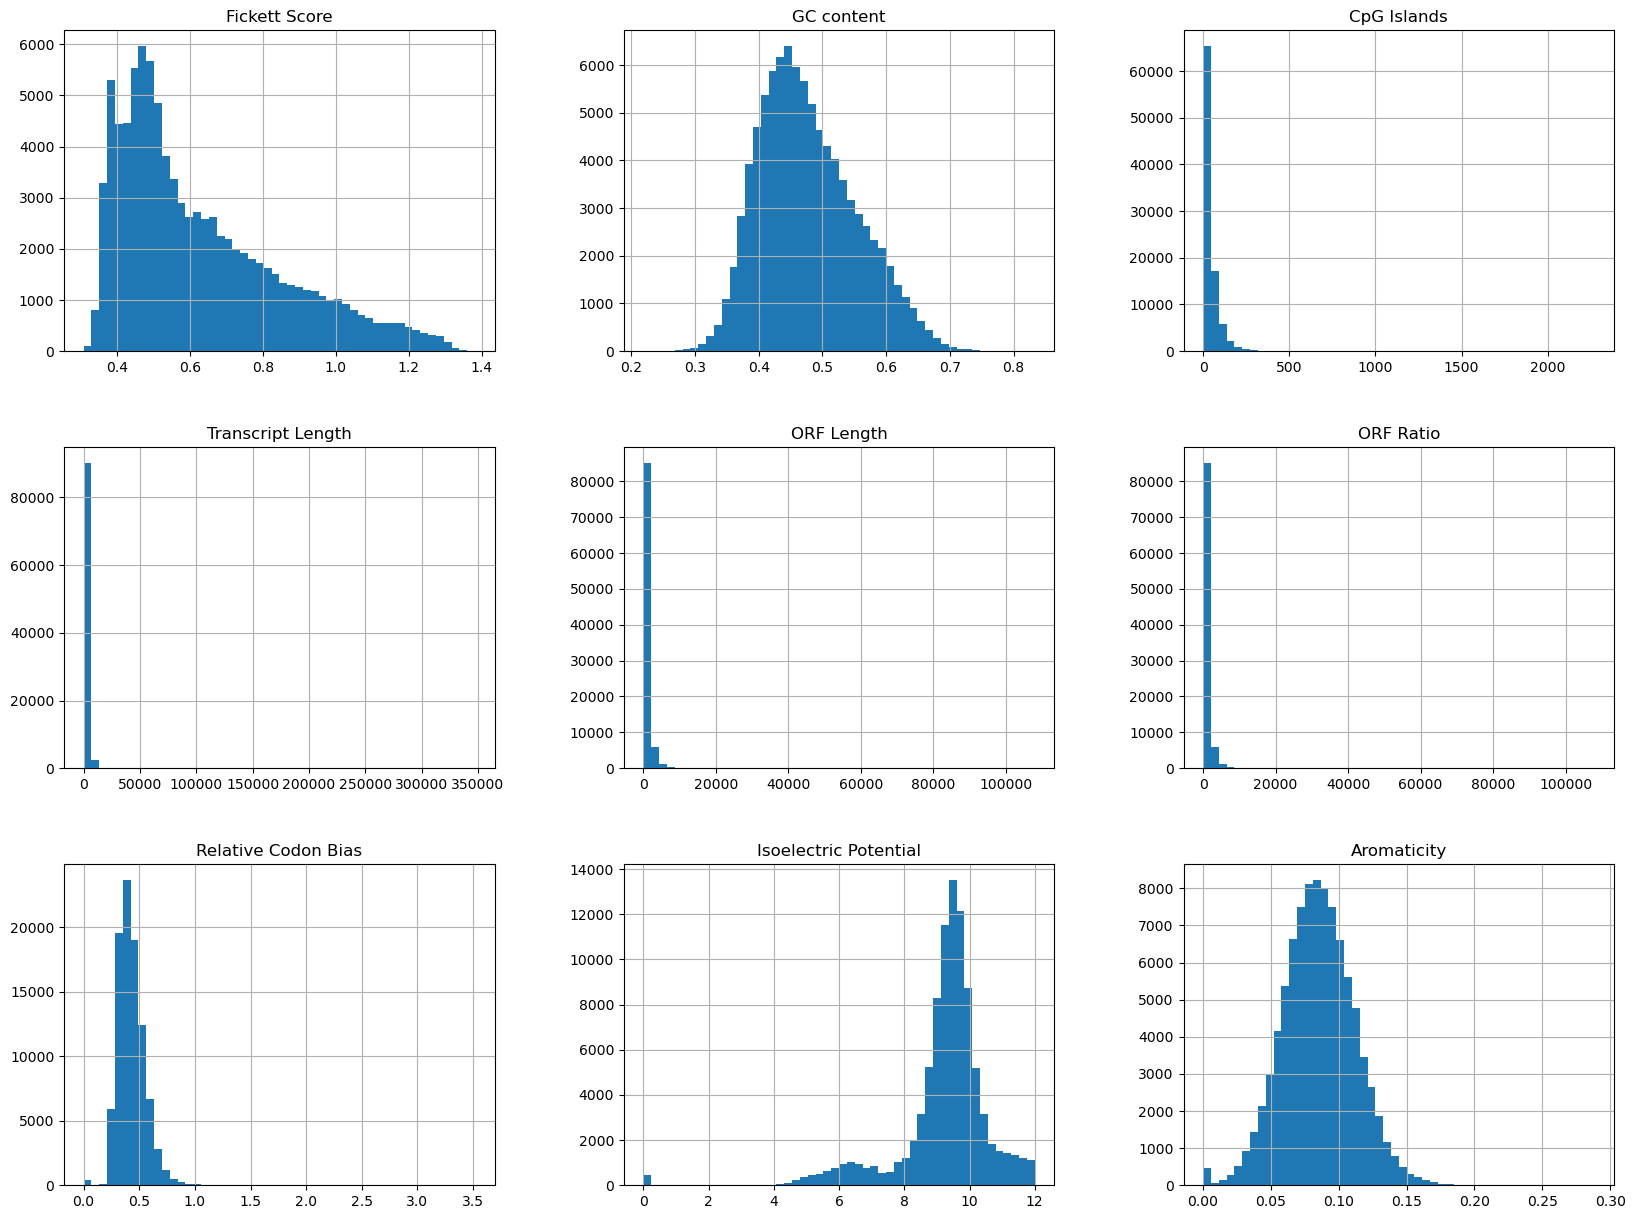

In [67]:
train.hist(bins=50, figsize=(20,15))  #plotting data
plt.show()

<AxesSubplot:xlabel='ORF Length'>

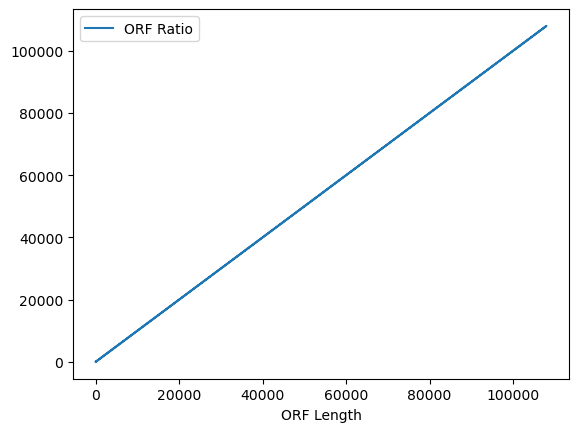

In [68]:
train.plot( x="ORF Length", y="ORF Ratio")  #they are same

<AxesSubplot:xlabel='Fickett Score', ylabel='Aromaticity'>

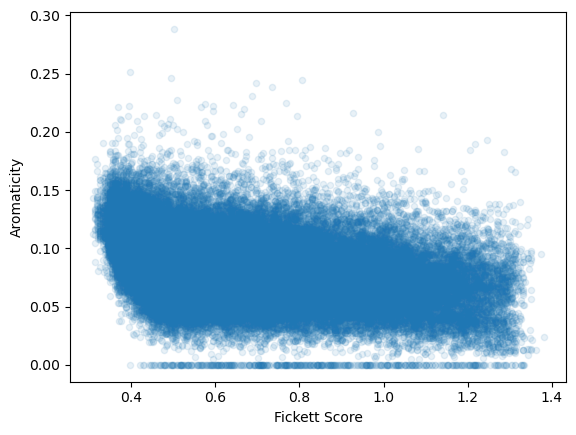

In [72]:
train.plot(kind = "scatter", x="Fickett Score", y="Aromaticity", alpha = 0.1)

<AxesSubplot:xlabel='GC content', ylabel='Aromaticity'>

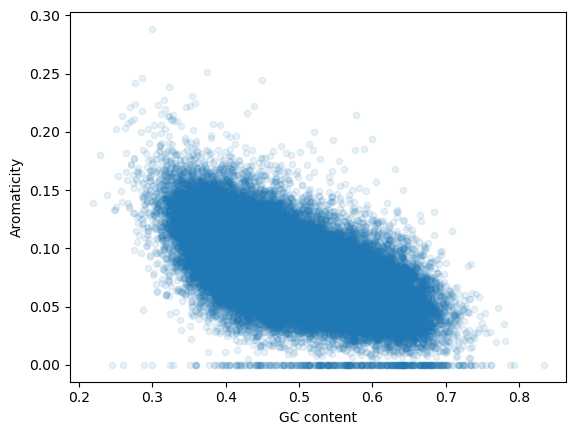

In [80]:
train.plot(kind = "scatter", x="GC content", y="Aromaticity", alpha = 0.1)